<a href="https://colab.research.google.com/github/sayevvv/PCVK_2025/blob/main/PCVK_modul5_Abdullah_Shamil_Basayev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

#Praktikum

#1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


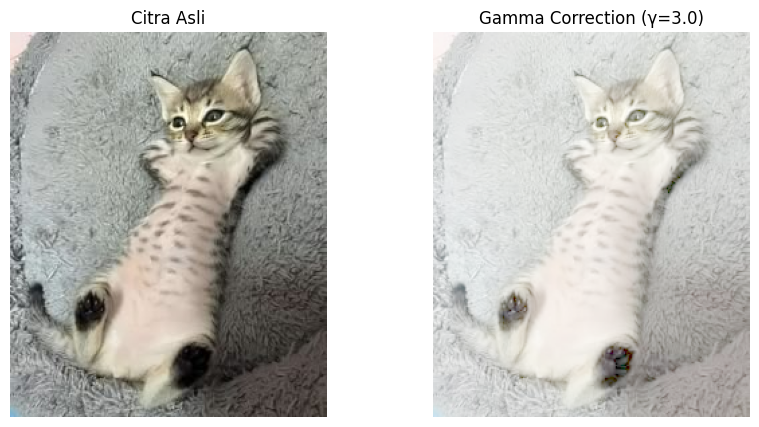

In [ ]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dari Google Drive
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menampilkan informasi awal
print('Gamma Correction pada citra')
print('---------------------------------')

# Meminta input gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Normalisasi dan terapkan gamma correction
gamma_corrected = np.power(img / 255.0, 1 / gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

# Menampilkan hasil perbandingan
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Citra Asli')
ax[0].axis('off')

ax[1].imshow(gamma_corrected)
ax[1].set_title(f'Gamma Correction (γ={gamma})')
ax[1].axis('off')

plt.show()


#2. Buat Simulasi Image Depth

Simulasi Image Depth
----------------------------------
Masukkan bit depth (misal: 2, 3, 4, 5, 6, 7, 8): 5


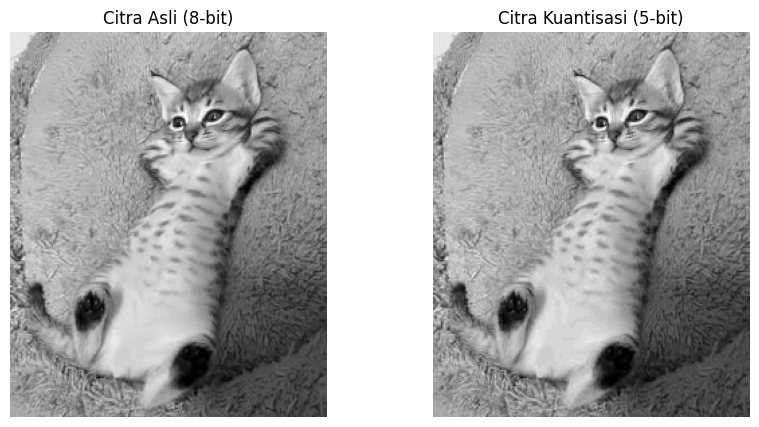

In [ ]:
# --- Simulasi Image Depth (Kuantisasi Citra) ---
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print('Simulasi Image Depth')
print('----------------------------------')

# Baca citra grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if original is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Meminta input bit depth dari user
    try:
        bit_depth = int(input('Masukkan bit depth (misal: 2, 3, 4, 5, 6, 7, 8): '))
    except ValueError:
        print('Error, not a number')
        bit_depth = 8  # default

    # Pastikan bit depth berada dalam rentang valid
    bit_depth = max(1, min(8, bit_depth))

    # Hitung level kuantisasi
    level = 255 / (pow(2, bit_depth) - 1)

    # Kuantisasi citra
    depth_image = np.round(original / level) * level
    depth_image = np.uint8(depth_image)

    # Tampilkan hasil
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title('Citra Asli (8-bit)')
    ax[0].axis('off')

    ax[1].imshow(depth_image, cmap='gray')
    ax[1].set_title(f'Citra Kuantisasi ({bit_depth}-bit)')
    ax[1].axis('off')

    plt.show()

Modul Average Denoising (Simulasi)
----------------------------------
Jumlah 1 citra → PSNR = 28.41 dB
Jumlah 2 citra → PSNR = 28.92 dB
Jumlah 5 citra → PSNR = 29.96 dB
Jumlah 10 citra → PSNR = 31.27 dB


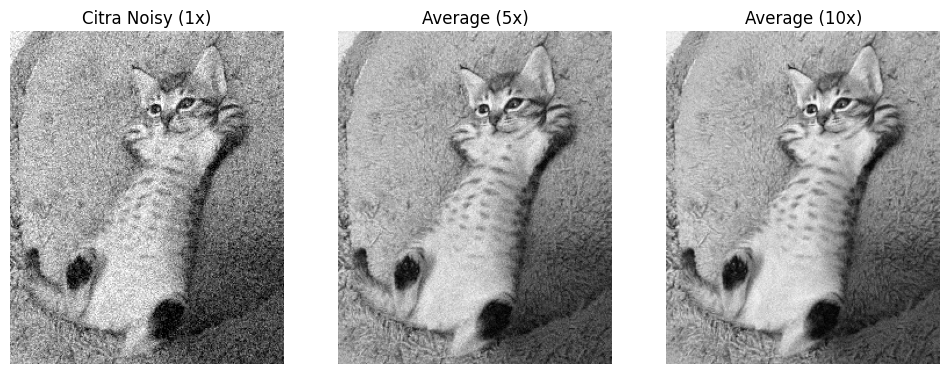


Tabel Hasil PSNR:


,Jumlah Citra di Average,Nilai PSNR (dB)
0,1,28.41
1,2,28.92
2,5,29.96
3,10,31.27


In [1]:
# --- Modul Average Denoising (Simulasi 1 Gambar Kitten) ---
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi PSNR
def psnr(target, ref):
    mse = np.mean((target - ref) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

print('Modul Average Denoising (Simulasi)')
print('----------------------------------')

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Simulasi menambahkan Gaussian Noise pada gambar yang sama beberapa kali
num_images = 10  # misalnya 10 versi noise
cv_img = []

for i in range(num_images):
    noise = np.random.normal(0, 25, original_gray.shape)  # mean=0, std=25
    noisy_img = original_gray + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    cv_img.append(noisy_img)

# Average Denoising
jumlah_citra_list = [1, 2, 5, 10]
psnr_values = []

for jumlah in jumlah_citra_list:
    avg_img = np.mean(cv_img[:jumlah], axis=0)
    avg_img = np.uint8(avg_img)
    nilai_psnr = psnr(original_gray, avg_img)
    psnr_values.append(nilai_psnr)
    print(f"Jumlah {jumlah} citra → PSNR = {nilai_psnr:.2f} dB")

# Visualisasi contoh hasil
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(cv_img[0], cmap='gray')
plt.title('Citra Noisy (1x)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.uint8(np.mean(cv_img[:5], axis=0)), cmap='gray')
plt.title('Average (5x)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.uint8(np.mean(cv_img[:10], axis=0)), cmap='gray')
plt.title('Average (10x)')
plt.axis('off')

plt.show()

# Tabel PSNR
df = pd.DataFrame({
    'Jumlah Citra di Average': jumlah_citra_list,
    'Nilai PSNR (dB)': [round(v, 2) for v in psnr_values]
})
print('\nTabel Hasil PSNR:')
display(df)
